In [1]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from IPython.display import clear_output




from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map,plot_map_diff_only
from useful_scit.imps import (np, xr, plt, pd)
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.plot.plot_profiles import plot_profile, set_legend_area_profs, set_scalar_formatter

# load and autoreload
from useful_scit.plot import get_cmap_dic
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV/
/home/ubuntu/mnts/nird/projects/OAS-DEV/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from matplotlib import gridspec

In [3]:
plot_path = get_plotpath('comparison')
print(plot_path)
make_folders(plot_path)
fn_base = plot_path + '/prof_map_'
print(fn_base)

/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison/
/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison//prof_map_


In [4]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
if avg_over_lev:
    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

In [5]:
cases_sec = ['SECTv21_ctrl_koagD']#, 'SECTv21_ctrl_def']
cases_orig =['noSECTv21_default_dd','noSECTv21_ox_ricc_dd']
#cases_orig =['noSECTv21_ox_ricc']

cases = cases_orig + cases_sec

In [6]:
import cartopy.crs as ccrs

from sectional_v2.util.plot.colors import get_area_col
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sectional_v2.data_info import get_nice_name_case

In [7]:
linests = ['solid','-.',':'][::-1]
areas = ['Global','notLand','Amazonas and surroundings', 'Polar N','Polar S']
areas = ['Global','Polar S','Amazonas and surroundings']
areas = ['Global','Polar S','Amazonas and surroundings']

import seaborn as sns

In [8]:
SOA_NA='SOA_NA'
SO4_NA='SO4_NA'

In [9]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [10]:
def map_sub(ax3, cases, relative, var, var_map, varl,kwargs_diff=None):
    if var_map is not None:
        var = var_map
    maps_dic = get_averaged_fields.get_maps_cases(cases, varl, startyear, endyear,
                                                  avg_over_lev=avg_over_lev,
                                                  pmin=pmin,
                                                  pressure_adjust=pressure_adjust)
    plot_map_diff_only(var, cases, maps_dic, relative=relative, cbar_equal=True,
                       kwargs_diff=kwargs_diff, axs=ax3, #cmap_diff='RdBu_r',
                       cbar_loc='under', tight_layout=False)


def profiles_sub(areas, ax1, cases, linestd, linestd_nn, var, varl):
    for case, ls in zip(cases, linests):
        linestd[case] = ls
        linestd_nn[get_nice_name_case(case)] = ls
    ax = ax1  # plt.subplots(1, figsize=[6,8])
    for area in areas:
        prof_dic = get_averaged_fields.get_profiles(cases, varl, startyear, endyear, area=area,
                                                    pressure_adjust=pressure_adjust)

        for case in cases:
            kwargs = dict(color=get_area_col(area), linestyle=linestd[case])
            plot_profile(prof_dic[case][var],
                         ax=ax,
                         kwargs=kwargs,
                         xscale='linear',
                         label=case + ', ' + area,
                         ylim=[1000, 200])  # ,
    ax.grid(False, which='both')
    sns.despine(ax=ax)
    #ax.set_yscale('log')
    set_scalar_formatter(ax)

In [11]:
from sectional_v2.util.slice_average.significance import load_and_plot_sign

eee


In [12]:
def plot_all_cases_maps_prof(var1, relative=True, width_ratios = [3, .7,1.8], plot_significance=False,asp_rat=.55,width=6.8):
    #varl_map=None
    nvars=1
    fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
    gs = gridspec.GridSpec(2, nvars+2,  width_ratios=width_ratios)
    ax_prof = plt.subplot(gs[:,0])
    ax_labs = plt.subplot(gs[:,1])
    ax_maps1 = plt.subplot(gs[0,2], projection=ccrs.Robinson())
    ax_maps2 = plt.subplot(gs[1,2], projection=ccrs.Robinson())
    axs_maps = [ax_maps1, ax_maps2]
    linestd=dict()
    linestd_nn=dict()
    varl = [var1]#,'SO4_NA']

    profiles_sub(areas, ax_prof, cases, linestd, linestd_nn, var1, varl)
    linestd=dict()
    linestd_nn=dict()
    for case, ls in zip(cases, linests):
        linestd[case]=ls
        linestd_nn[get_nice_name_case(case)]=ls
    ax =ax_prof# plt.subplots(1, figsize=[6,8])
    cases_nn = [get_nice_name_case(case) for case in cases]
    ax_labs.axis('off')

    set_legend_area_profs(ax_labs, areas,cases_nn, linestd_nn)


    ax_prof.yaxis.set_ticklabels([])
    ax_prof.set_ylabel('')
    # maps:
    kwargs_diff=dict()#vmin=-15, vmax=-0.001)
    map_sub(ax_maps1, [cases_orig[0],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
    map_sub(ax_maps2, [cases_orig[1],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
    ax_maps1.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[0])}')
    ax_maps2.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[1])}')
    
    ax_prof.set_ylabel('Pressure [hPa]')
    
    axs_np = np.array([ax_prof]+axs_maps)
    
    subp_insert_abc(axs_np, pos_y =.01, pos_x=1)

    return ax_prof, ax_labs, axs_maps

In [13]:
areas = ['Global','notLand','Polar S','Amazonas and surroundings']

## Paper figure:

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/N_AER_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/N_AER_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison//prof_map_N_AER_2008-01-2014-12_noSECTv21_default_dd_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


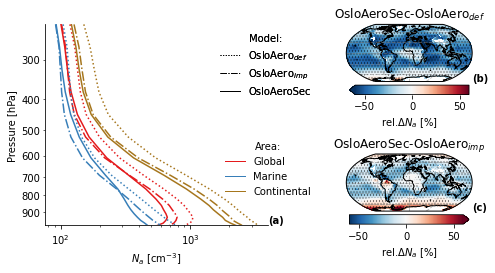

In [14]:
areas = ['Global','notLand','landOnly']#, 'Polar N','Polar S']
#areas = ['Global','notLand','landOnly','Amazonas and surroundings']#,'Polar S']

var1 = 'N_AER'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1, width_ratios=[3, .3,1.7], width=7.0)
axs_prof.set_ylabel('Pressure [hPa]')
load_and_plot_sign(cases_sec[0], cases_orig[:2], axs_maps, var1, startyear, endyear, pressure_adjust=pressure_adjust,
                       avg_over_lev=avg_over_lev,
                       ci=.95,
                       groupby=None,
                       dims=('lev',),
                       area='Global',
                       avg_dim='time',
                       hatches=None, hatch_lw = .4, transform=ccrs.PlateCarree(),
                       reverse=False)
vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
axs_prof.set_xscale('log')
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)
#axs_prof.set_yxscale([10,1e3])
plt.show()

In [ ]:
areas = ['Global','notLand','landOnly']#, 'Polar N','Polar S']
#areas = ['Global','notLand','landOnly','Amazonas and surroundings']#,'Polar S']

var1 = 'N_AER'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1, width_ratios=[3, .3,1.7], width=7.0)
axs_prof.set_ylabel('Pressure [hPa]')
load_and_plot_sign(cases_sec[0], cases_orig[:2], axs_maps, var1, startyear, endyear, pressure_adjust=pressure_adjust,
                       avg_over_lev=avg_over_lev,
                       ci=.95,
                       groupby=None,
                       dims=('lev',),
                       area='Global',
                       avg_dim='time',
                       hatches=None, hatch_lw = .4, transform=ccrs.PlateCarree(),
                       reverse=False)
vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
axs_prof.set_xscale('log')
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)
#axs_prof.set_yxscale([10,1e3])
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/HYGRO01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/HYGRO01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/HYGRO01_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/HYGRO01_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/HYGRO01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/HYGRO01_2008-01-2014-12.nc 
Saving datase

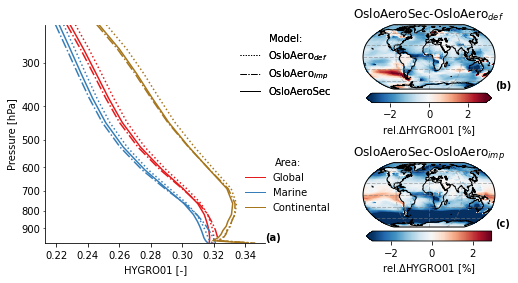

In [15]:
var1 = 'HYGRO01'
ax_prof, ax_labs, axs_maps = plot_all_cases_maps_prof(var1, relative=True, width_ratios=[3, .6,1.8], width=7.3)

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/N_AER_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/N_AER_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/N_AER_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/N_AER_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/N_AER_2008-01-2

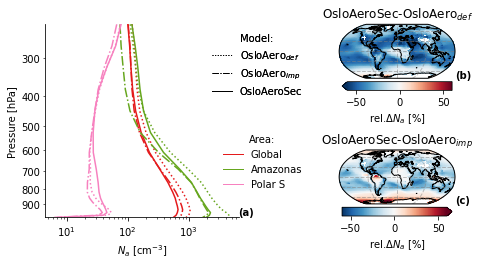

In [15]:
areas = ['Global','notLand','landOnly']#, 'Polar N','Polar S']
areas = ['Global','Amazonas and surroundings','Polar S']

var1 = 'N_AER'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1, width_ratios=[3, .6,1.8])

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
axs_prof.set_xscale('log')
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)
#axs_prof.set_yxscale([10,1e3])
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SOA_LV_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/SOA_LV_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SOA_LV_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/SOA_LV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/SOA_LV_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/SOA_LV_200

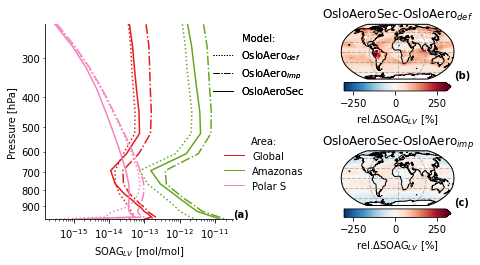

In [16]:
#areas = ['Global','notLand','landOnly', 'Polar N','Polar S']
var1 = 'SOA_LV'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1)

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)
axs_prof.set_xscale('log')
#axs_prof.set_yxscale([10,1e3])
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/monoterp_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/monoterp_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/monoterp_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/monoterp_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/monoterp_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/

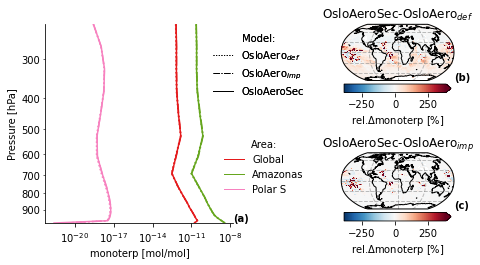

In [17]:
#areas = ['Global','notLand','landOnly', 'Polar N','Polar S']
var1 = 'monoterp'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1)

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)
axs_prof.set_xscale('log')
#axs_prof.set_yxscale([10,1e3])
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/H2SO4_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/H2SO4_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/H2SO4_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/H2SO4_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/H2SO4_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Amazonas_and_surroundings/H2SO4_2008-01-2

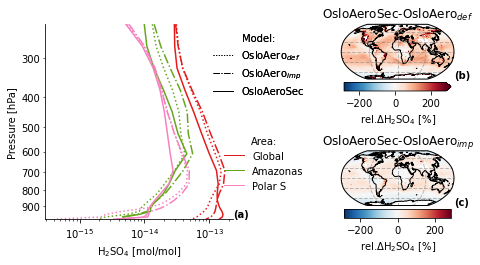

In [18]:
#areas = ['Global','notLand','landOnly', 'Polar N','Polar S']
var1 = 'H2SO4'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1)

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)
axs_prof.set_xscale('log')
#axs_prof.set_yxscale([10,1e3])
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SO2_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/SO2_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SO2_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SO2_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/SO2_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SO2_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/

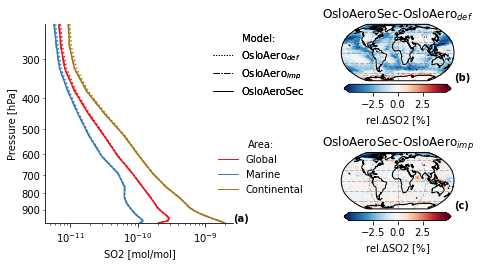

In [19]:
#areas = ['Global','notLand','landOnly', 'Polar N','Polar S']
areas = ['Global','notLand','landOnly']
var1 = 'SO2'
axs_prof,ax_leg, axs_maps = plot_all_cases_maps_prof(var1)

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)
axs_prof.set_xscale('log')
#axs_prof.set_yxscale([10,1e3])
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/NMR01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/NMR01_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/NMR01_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/NMR01_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/NMR01_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/NMR01_2008-01-2014-12.nc 
Saving dataset to: /home/

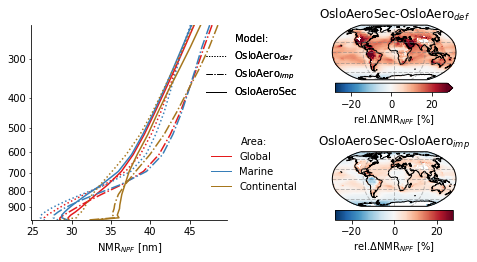

In [20]:
asp_rat=.55
width=6.8
relative=True
varl_map=None
nvars=1
fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
gs = gridspec.GridSpec(2, nvars+2,  width_ratios=[3, .7,1.9])
axs_prof = []
axs_maps = []
ax1 = plt.subplot(gs[:,0])
ax_labs = plt.subplot(gs[:,1])
ax_maps1 = plt.subplot(gs[0,2], projection=ccrs.Robinson())
ax_maps2 = plt.subplot(gs[1,2], projection=ccrs.Robinson())
var1 = 'NMR01'

linestd=dict()
linestd_nn=dict()
varl = [var1]#,'SO4_NA']

profiles_sub(areas, ax1, cases, linestd, linestd_nn, var1, varl)
linestd=dict()
linestd_nn=dict()
for case, ls in zip(cases, linests):
    linestd[case]=ls
    linestd_nn[get_nice_name_case(case)]=ls
ax =ax1# plt.subplots(1, figsize=[6,8])
cases_nn = [get_nice_name_case(case) for case in cases]
ax_labs.axis('off')

set_legend_area_profs(ax_labs, areas,cases_nn, linestd_nn)


ax1.yaxis.set_ticklabels([])
ax1.set_ylabel('')
# maps:
kwargs_diff=dict()#vmin=-15, vmax=-0.001)
map_sub(ax_maps1, [cases_orig[0],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
map_sub(ax_maps2, [cases_orig[1],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
ax_maps1.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[0])}')
ax_maps2.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[1])}')

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

In [21]:
areas = ['Global','notLand','landOnly']

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SOA_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/SOA_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SOA_NA_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SOA_NA_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/SOA_NA_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SOA_NA_2008-01-2014-12.nc 
Saving dataset to: 

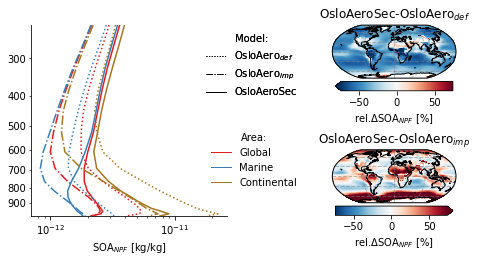

In [22]:
asp_rat=.55
width=6.8
relative=True
varl_map=None
nvars=1
fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
gs = gridspec.GridSpec(2, nvars+2,  width_ratios=[3, .7,1.9])
axs_prof = []
axs_maps = []
ax1 = plt.subplot(gs[:,0])
ax_labs = plt.subplot(gs[:,1])
ax_maps1 = plt.subplot(gs[0,2], projection=ccrs.Robinson())
ax_maps2 = plt.subplot(gs[1,2], projection=ccrs.Robinson())

var1 = 'SOA_NA'

linestd=dict()
linestd_nn=dict()
varl = [var1]#,'SO4_NA']

profiles_sub(areas, ax1, cases, linestd, linestd_nn, var1, varl)
ax1.set_xscale('log')
linestd=dict()
linestd_nn=dict()
for case, ls in zip(cases, linests):
    linestd[case]=ls
    linestd_nn[get_nice_name_case(case)]=ls
ax =ax1# plt.subplots(1, figsize=[6,8])
cases_nn = [get_nice_name_case(case) for case in cases]
ax_labs.axis('off')

set_legend_area_profs(ax_labs, areas,cases_nn, linestd_nn)


ax1.yaxis.set_ticklabels([])
ax1.set_ylabel('')
# maps:
kwargs_diff=dict()#vmin=-15, vmax=-0.001)
map_sub(ax_maps1, [cases_orig[0],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
map_sub(ax_maps2, [cases_orig[1],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
ax_maps1.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[0])}')
ax_maps2.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[1])}')

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SO4_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/SO4_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/SO4_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SO4_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/SO4_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/SO4_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_de

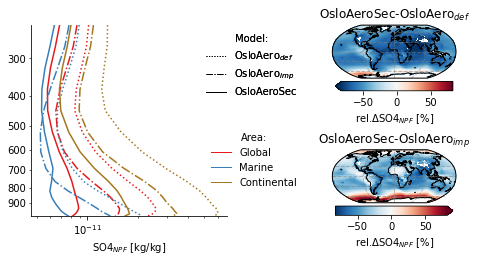

In [25]:
asp_rat=.55
width=6.8
relative=True
varl_map=None
nvars=1
fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
gs = gridspec.GridSpec(2, nvars+2,  width_ratios=[3, .7,1.9])
axs_prof = []
axs_maps = []
ax1 = plt.subplot(gs[:,0])
ax_labs = plt.subplot(gs[:,1])
ax_maps1 = plt.subplot(gs[0,2], projection=ccrs.Robinson())
ax_maps2 = plt.subplot(gs[1,2], projection=ccrs.Robinson())

var1 = 'SO4_NA'

linestd=dict()
linestd_nn=dict()
varl = [var1]#,'SO4_NA']

profiles_sub(areas, ax1, cases, linestd, linestd_nn, var1, varl)
ax1.set_xscale('log')
linestd=dict()
linestd_nn=dict()
for case, ls in zip(cases, linests):
    linestd[case]=ls
    linestd_nn[get_nice_name_case(case)]=ls
ax =ax1# plt.subplots(1, figsize=[6,8])
cases_nn = [get_nice_name_case(case) for case in cases]
ax_labs.axis('off')

set_legend_area_profs(ax_labs, areas,cases_nn, linestd_nn)


ax1.yaxis.set_ticklabels([])
ax1.set_ylabel('')
# maps:
kwargs_diff=dict()#vmin=-15, vmax=-0.001)
map_sub(ax_maps1, [cases_orig[0],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
map_sub(ax_maps2, [cases_orig[1],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
ax_maps1.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[0])}')
ax_maps2.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[1])}')

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AWNC_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AWNC_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/Global/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/Global/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AWNC_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AWNC_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/notLand/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/notLand/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/FREQL_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/AWNC_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/landOnly/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/FREQL_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/AWNC_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/landOnly/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_ox_ricc_dd/landOnly/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/landOnly/AWNC_incld_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/FREQL_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/AWNC_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/landOnly/AWNC_incld_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl_koagD/landOnly/AWNC_incld_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/ACTNL_incld_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/ACTNL_incld_2008-01-2014-12_lev_not_dim.nc
['SECTv21_ctrl_koagD']
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_ox_ricc_dd/ACTNL_incld_2008-01-2014-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl_koagD/ACTNL_incld_2008-01-2014-12_lev_not_dim.nc
['SECTv21_ctrl_koagD']
/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison//prof_map_ACTNL_incld_2008-01-2014-12_noSECTv21_default_dd_noSECTv21_ox_ricc_dd_SECTv21_ctrl_koagD.


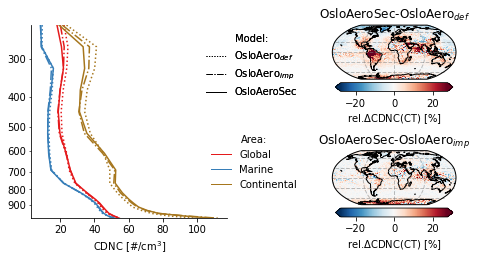

In [24]:
asp_rat=.55
width=6.8
relative=True
varl_map=None
nvars=1
fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
gs = gridspec.GridSpec(2, nvars+2,  width_ratios=[3, .7,1.9])
axs_prof = []
axs_maps = []
ax1 = plt.subplot(gs[:,0])
ax_labs = plt.subplot(gs[:,1])
ax_maps1 = plt.subplot(gs[0,2], projection=ccrs.Robinson())
ax_maps2 = plt.subplot(gs[1,2], projection=ccrs.Robinson())

var1 = 'AWNC_incld'

linestd=dict()
linestd_nn=dict()
varl = [var1]#,'SO4_NA']

profiles_sub(areas, ax1, cases, linestd, linestd_nn, var1, varl)
linestd=dict()
linestd_nn=dict()
for case, ls in zip(cases, linests):
    linestd[case]=ls
    linestd_nn[get_nice_name_case(case)]=ls
ax =ax1# plt.subplots(1, figsize=[6,8])
cases_nn = [get_nice_name_case(case) for case in cases]
ax_labs.axis('off')

set_legend_area_profs(ax_labs, areas,cases_nn, linestd_nn)
var1 = 'ACTNL_incld'
varl = [var1]#,'SO4_NA']

ax1.yaxis.set_ticklabels([])
ax1.set_ylabel('')
# maps:
kwargs_diff=dict()#vmin=-15, vmax=-0.001)
map_sub(ax_maps1, [cases_orig[0],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
map_sub(ax_maps2, [cases_orig[1],cases_sec[0]], relative, var1, None, varl, kwargs_diff=kwargs_diff)
ax_maps1.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[0])}')
ax_maps2.set_title(f'{get_nice_name_case(cases_sec[0])}-{get_nice_name_case(cases_orig[1])}')

vars_n = var1
fn_figure = '%s%s_%s-%s_%s.'%(fn_base,vars_n,startyear, endyear,'_'.join(cases))
print(fn_figure)
plt.tight_layout()
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()